The following data is acquired from https://data.tpdc.ac.cn/en/data/0fbc30a8-6065-4be3-b98b-95ae7f15a69e/

Further details are provided in the excel sheet - Available_data - 

- Final_data_excelsheet/AWS_Yakou_ITP_Data_2015,16,17,18,19,20 (Sheet name)

- Begin with the 2019 dataset as the initial conditions for the model.  

The excel sheet contains the following parameters:

1. Wind speed at 10 m
2. Wind direction at 10 m
3. Air temperature at 5 m 
4. Relative humidity at 5 m 
5. Precipitation at 10 m
6. Air pressure 
7. Infrared temperature 
8. Incoming shortwave radiation
9. Outgoing shortwave radiation
10. Incoming longwave radiation
11. Outgoing longwave radiation
12. Net radiation
13. Soil heat flux at - 0.06 m
14. Soil moisture at - 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m
15. Soil temperature - 0.00 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import h5py

In [2]:
sns.set()

In [3]:
import os
print(os.getcwd()) 

/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk


### 1. Reading the data

In [4]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

### Extracting the AWS met data (2015 - 2020)

#### Creating a single csv file that stores all the data

In [5]:
### Reading the data
df_AWS_2015 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2015.xlsx',index_col=0,parse_dates=True)  
df_AWS_2016 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2016.xlsx',index_col=0,parse_dates=True)
df_AWS_2017 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2017.xlsx',index_col=0,parse_dates=True)
df_AWS_2018 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2018.xlsx',index_col=0,parse_dates=True)
df_AWS_2019 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2019.xlsx',index_col=0,parse_dates=True)
df_AWS_2020 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2020.xlsx',index_col=0,parse_dates=True)

In [6]:
### Merging the data - https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Combining the dataset into a single dataframe
frames = [df_AWS_2015, df_AWS_2016, df_AWS_2017, df_AWS_2018, df_AWS_2019, df_AWS_2020]
df_AWS = pd.concat(frames)
df_AWS.head()

,WS_10m,WD_10m,Ta_5m,RH_5m,Rain,Press,IRT_1,IRT_2,PAR_down,PAR_up,DR,UR,DLR_Cor,ULR_Cor,Rn,Gs_1,Gs_2,Gs_3,Ms_4cm,Ms_10cm,Ms_20cm,Ms_40cm,Ms_80cm,Ms_120cm,Ms_160cm,Ts_0cm,Ts_4cm,Ts_10cm,Ts_20cm,Ts_40cm,Ts_80cm,Ts_120cm,Ts_160cm,Unnamed: 34
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-18 12:40:00,4.114,195.0,1.872,79.55,0.0,619.5,10.720,10.510,136.60,15.390,761.7,122.90,257.7,385.9,510.7,1.851,27.56,41.13,40.85,37.72,39.97,37.92,15.63,11.89,23.02,11.170,3.927,2.504,2.547,3.001,1.803,0.402,0.075,NaN
2015-09-18 12:50:00,4.746,186.5,1.740,79.02,0.0,619.6,8.170,8.240,69.70,7.617,376.6,52.88,267.1,383.3,207.5,3.026,31.32,45.79,40.87,37.72,39.98,37.91,15.63,11.89,23.02,9.870,4.167,2.582,2.559,2.993,1.804,0.402,0.075,NaN
2015-09-18 13:00:00,5.071,198.9,1.463,80.40,0.0,619.6,6.084,5.969,49.68,5.490,249.2,32.05,300.3,377.3,140.2,4.481,34.92,49.90,40.86,37.73,39.97,37.91,15.64,11.89,23.04,7.719,4.416,2.675,2.574,2.983,1.802,0.405,0.074,NaN
2015-09-18 13:10:00,5.515,204.3,1.165,80.20,0.0,619.5,5.530,5.373,53.82,5.889,273.2,32.05,277.8,374.0,145.0,6.054,35.88,49.80,40.87,37.72,39.98,37.90,15.64,11.90,23.06,7.007,4.564,2.775,2.590,2.972,1.801,0.405,0.078,NaN
2015-09-18 13:20:00,5.155,200.4,0.973,83.60,0.0,619.4,5.312,5.153,50.15,5.453,234.0,32.05,306.3,372.8,135.4,7.647,34.43,46.08,40.87,37.72,39.97,37.90,15.64,11.90,23.07,6.489,4.618,2.880,2.610,2.965,1.799,0.405,0.080,NaN


In [7]:
# Dropping an unnecessary column:
df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [8]:
df_AWS.index

DatetimeIndex([       '2015-09-18 12:40:00',        '2015-09-18 12:50:00',
                      '2015-09-18 13:00:00',        '2015-09-18 13:10:00',
                      '2015-09-18 13:20:00',        '2015-09-18 13:30:00',
                      '2015-09-18 13:40:00',        '2015-09-18 13:50:00',
                      '2015-09-18 14:00:00',        '2015-09-18 14:10:00',
               ...
               '2020-12-31 22:19:59.980000', '2020-12-31 22:29:59.980000',
               '2020-12-31 22:39:59.980000', '2020-12-31 22:49:59.980000',
               '2020-12-31 22:59:59.980000', '2020-12-31 23:09:59.980000',
               '2020-12-31 23:19:59.980000', '2020-12-31 23:29:59.980000',
               '2020-12-31 23:39:59.980000', '2020-12-31 23:49:59.980000'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=278132, freq=None)

Comments:
- Data is available from 2015-09-18 to 2020-12-31 [2015-09-18 12:40:00 to 2020-12-31 23:49:59.98]

In [9]:
### Storing 2015 - 2020 dataset in a csv file. - 
#df_AWS.to_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx')

### Extracting the details about the AWS met data - 

In [10]:
df_AWS_details = pd.read_excel('../Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [11]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [12]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [13]:
data_AWS_prep = data_AWS_syn.copy()

In [14]:
### Check for NaN values
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]]

DatetimeIndex([       '2018-04-20 14:00:00',        '2018-04-20 14:10:00',
                      '2018-05-05 14:30:00', '2018-12-10 08:39:59.995000',
               '2018-12-10 09:19:59.995000', '2018-12-10 09:29:59.995000',
                      '2019-01-22 07:30:00',        '2019-01-30 17:30:00',
                      '2019-01-30 21:00:00',        '2019-01-31 00:40:00',
               ...
               '2020-12-31 16:09:59.980000', '2020-12-31 16:19:59.980000',
               '2020-12-31 16:29:59.980000', '2020-12-31 16:39:59.980000',
               '2020-12-31 16:49:59.980000', '2020-12-31 16:59:59.980000',
               '2020-12-31 17:09:59.980000', '2020-12-31 17:19:59.980000',
               '2020-12-31 17:29:59.980000', '2020-12-31 17:39:59.980000'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=40078, freq=None)

In [15]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [16]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [17]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

In [18]:
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]]

DatetimeIndex(['2019-10-09', '2019-10-09', '2019-10-10', '2019-10-10',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19',
               '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=144, freq=None)

In [19]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

144

In [20]:
data_AWS_syn.describe()

,Wind speed at 10 m (m/s),Wind direction at 10 m (°),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Precipitation at 10 m (mm),Air pressure (hPa),Infrared temperature (°C),Infrared temperature (°C),PAR_down,PAR_up,Incoming shortwave radiation (W/m^2),Outgoing shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Outgoing longwave radiation (W/m^2),Net radiation (W/m^2),Soil heat flux at - 0.06 m (W/m^2) - 1,Soil heat flux at - 0.06 m (W/m^2) - 2,Soil heat flux at - 0.06 m (W/m^2) - 3,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
count,1930.000000,1929.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1852.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1873.000000,1932.000000
mean,4.361025,150.264459,-5.298477,59.387797,0.008359,613.017495,-6.080640,-6.364456,39.175315,18.934304,210.194357,102.248858,220.833211,292.078537,24.364237,-0.889387,1.140762,1.080090,19.898486,20.269220,19.894043,19.337393,10.278427,6.419632,9.590706,-3.607434,-3.882118,-2.783644,-2.805152,-2.699158,-2.510431,-2.273102,-2.110162
std,1.565687,81.143994,8.003990,23.037716,0.022512,4.819749,10.437266,9.790861,16.079437,17.747199,116.062383,79.722498,64.570972,49.188007,82.903297,9.049819,8.670412,10.913594,13.682629,13.336612,12.334962,11.145118,4.901011,3.415332,4.592914,8.240899,7.525715,7.267117,6.800508,5.968668,5.047743,3.903623,3.307145
min,0.280000,0.000000,-28.476389,8.793979,0.000000,600.808333,-29.598889,-29.090903,8.936646,0.628153,-56.094861,7.286694,105.954861,199.021528,-193.412417,-25.847118,-23.856250,-29.374028,6.141292,6.834750,7.739764,8.136875,4.733222,3.040326,4.026632,-23.694444,-19.528889,-17.424167,-16.499097,-14.824167,-12.795000,-10.323125,-8.990833
25%,3.368000,97.629097,-12.180116,40.251910,0.000000,609.357812,-15.479304,-15.221509,25.791026,3.855776,141.222944,41.789979,163.010243,248.600000,-25.194375,-7.447281,-4.857196,-5.794000,8.086668,8.630000,8.905556,9.249271,5.541000,3.648481,4.915458,-10.675417,-10.799601,-9.512569,-9.143646,-8.299731,-7.201408,-6.171965,-5.279023
50%,4.078135,161.750352,-5.137122,60.348542,0.000000,614.137153,-6.852424,-6.184691,36.332374,13.667524,193.328806,75.835031,212.142361,278.910764,14.862934,-1.605427,-1.110007,-1.221910,10.961840,11.738368,12.813507,12.739826,7.822000,6.758594,9.343056,-2.336535,-2.429413,-1.111611,-0.948372,-1.003448,-1.057792,-0.576410,-0.667740
75%,5.114575,206.533312,1.390510,79.863142,0.002778,617.100000,3.141073,1.708943,50.437967,28.941639,269.000789,139.194151,274.733507,331.282986,78.574293,3.886505,3.835682,5.078771,36.446667,35.929236,34.566892,32.562326,15.270972,8.420156,13.324028,2.376432,1.387377,2.346080,1.972707,1.569012,0.837132,0.242164,0.179431
max,13.608847,303.400000,11.823174,96.875000,0.219444,622.882639,18.081250,16.090000,99.300000,67.282264,1471.012034,348.573819,370.592361,413.986111,239.133924,36.631549,42.019160,66.850000,44.007639,46.251181,41.966250,41.107569,38.694236,40.891667,29.776944,16.650000,12.648792,12.855000,11.330000,8.869653,6.858264,6.096389,3.262208


### Comments:
- Missing values of some significant individual variables {identified by the count (max. total number of points) = 1932}
    - Incoming shortwave radiation (W/m^2) : 80
    - Soil temperature at 1.2 m depth : 59

- Important to know where the data variables are missing

- Incoming shortwave radiation

In [21]:
data_AWS_syn['Incoming shortwave radiation (W/m^2)'].index[np.where(np.isnan(data_AWS_syn['Incoming shortwave radiation (W/m^2)']))[0]]

DatetimeIndex(['2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
      

### Comments:
- Most of the data points is not available in the year 2020 [From 2020-02 : 2020-04]

In [22]:
data_AWS_syn['Soil temperature at - 1.2 m (°C)'].index[np.where(np.isnan(data_AWS_syn['Soil temperature at - 1.2 m (°C)']))[0]]

DatetimeIndex(['2020-05-01', '2020-06-05', '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-09-01', '2020-09-02', '2020-09-03',
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-10', '2020-11-11', '2020-11-14', '2020-11-20',
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
               '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
      

### Comments:
- Most of the data points is not available in the year 2020 

#### Precipitation - Daily summation of the values are determined instead of mean

In [23]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

### Plotting Wind speed at 10 m, Air temperature at 5 m, Relative humidity at 5 m, Precipitation at 10 m, Air pressure - Daily scale - For the year 2015-2020

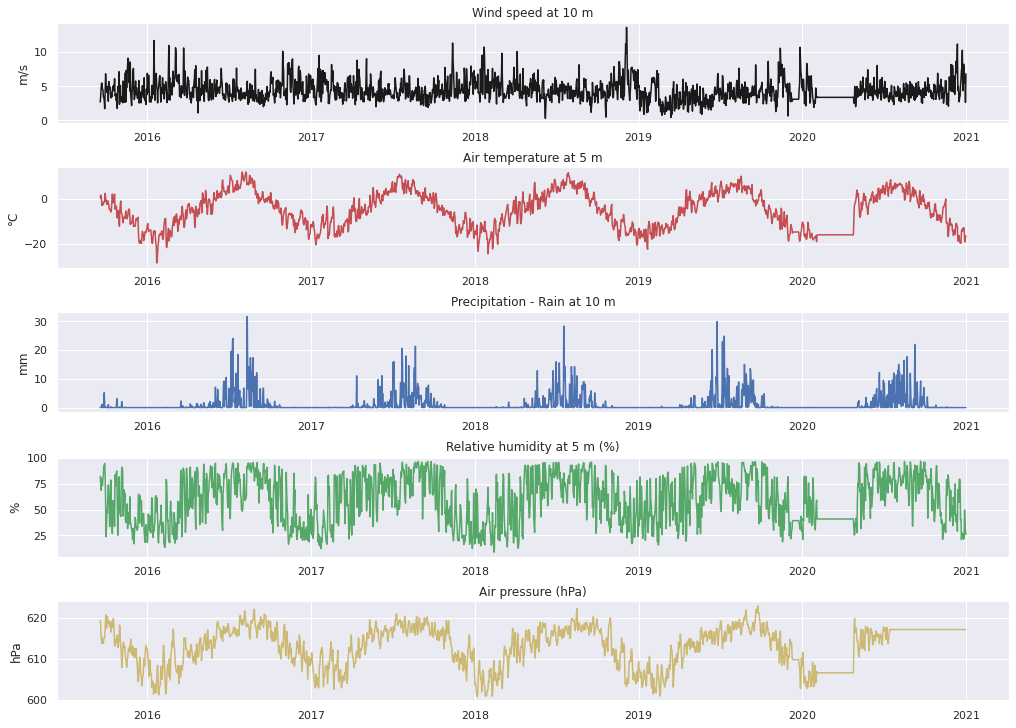

In [24]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_syn['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_prep_dailysum, 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Air pressure (hPa)')
f2_ax5.plot(data_AWS_syn['Air pressure (hPa)'], 'y',label='Air pressure (hPa)')
f2_ax5.set_ylabel('hPa')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)


In [25]:
data_AWS_syn.describe()

,Wind speed at 10 m (m/s),Wind direction at 10 m (°),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Precipitation at 10 m (mm),Air pressure (hPa),Infrared temperature (°C),Infrared temperature (°C),PAR_down,PAR_up,Incoming shortwave radiation (W/m^2),Outgoing shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Outgoing longwave radiation (W/m^2),Net radiation (W/m^2),Soil heat flux at - 0.06 m (W/m^2) - 1,Soil heat flux at - 0.06 m (W/m^2) - 2,Soil heat flux at - 0.06 m (W/m^2) - 3,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
count,1930.000000,1929.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1852.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1873.000000,1932.000000
mean,4.361025,150.264459,-5.298477,59.387797,0.008359,613.017495,-6.080640,-6.364456,39.175315,18.934304,210.194357,102.248858,220.833211,292.078537,24.364237,-0.889387,1.140762,1.080090,19.898486,20.269220,19.894043,19.337393,10.278427,6.419632,9.590706,-3.607434,-3.882118,-2.783644,-2.805152,-2.699158,-2.510431,-2.273102,-2.110162
std,1.565687,81.143994,8.003990,23.037716,0.022512,4.819749,10.437266,9.790861,16.079437,17.747199,116.062383,79.722498,64.570972,49.188007,82.903297,9.049819,8.670412,10.913594,13.682629,13.336612,12.334962,11.145118,4.901011,3.415332,4.592914,8.240899,7.525715,7.267117,6.800508,5.968668,5.047743,3.903623,3.307145
min,0.280000,0.000000,-28.476389,8.793979,0.000000,600.808333,-29.598889,-29.090903,8.936646,0.628153,-56.094861,7.286694,105.954861,199.021528,-193.412417,-25.847118,-23.856250,-29.374028,6.141292,6.834750,7.739764,8.136875,4.733222,3.040326,4.026632,-23.694444,-19.528889,-17.424167,-16.499097,-14.824167,-12.795000,-10.323125,-8.990833
25%,3.368000,97.629097,-12.180116,40.251910,0.000000,609.357812,-15.479304,-15.221509,25.791026,3.855776,141.222944,41.789979,163.010243,248.600000,-25.194375,-7.447281,-4.857196,-5.794000,8.086668,8.630000,8.905556,9.249271,5.541000,3.648481,4.915458,-10.675417,-10.799601,-9.512569,-9.143646,-8.299731,-7.201408,-6.171965,-5.279023
50%,4.078135,161.750352,-5.137122,60.348542,0.000000,614.137153,-6.852424,-6.184691,36.332374,13.667524,193.328806,75.835031,212.142361,278.910764,14.862934,-1.605427,-1.110007,-1.221910,10.961840,11.738368,12.813507,12.739826,7.822000,6.758594,9.343056,-2.336535,-2.429413,-1.111611,-0.948372,-1.003448,-1.057792,-0.576410,-0.667740
75%,5.114575,206.533312,1.390510,79.863142,0.002778,617.100000,3.141073,1.708943,50.437967,28.941639,269.000789,139.194151,274.733507,331.282986,78.574293,3.886505,3.835682,5.078771,36.446667,35.929236,34.566892,32.562326,15.270972,8.420156,13.324028,2.376432,1.387377,2.346080,1.972707,1.569012,0.837132,0.242164,0.179431
max,13.608847,303.400000,11.823174,96.875000,0.219444,622.882639,18.081250,16.090000,99.300000,67.282264,1471.012034,348.573819,370.592361,413.986111,239.133924,36.631549,42.019160,66.850000,44.007639,46.251181,41.966250,41.107569,38.694236,40.891667,29.776944,16.650000,12.648792,12.855000,11.330000,8.869653,6.858264,6.096389,3.262208


Comments:
* The time period from '2019-12-12':'2019-12-24' and '2020-02':'2020-05' - Should be disregarded since the same values cannot occur at continous time periods
1. Wind speed at 10 m [m/s]
    * Wind speeds vary from 0 : 10.68 m/s with a mean of 3.793 m/s - That seems possible!
    * There is considerable variation - seems plausible.
    * Any chances of seasonality affects? - Westerlies during the winter and Indian Summer Monsoon during the summer.
2. Air temperature at 5 m [°C]
    * Varies from -22.37°C : 9.97°C with a mean of -5°C. - Very cold region!
    * The air temperature increases during the summer and decreases during the winter - Good!
    * Seasonality effects are clearly seen - Good! - Can probably be modelled!
3. Precipitation at 10 m [mm]
    * Variations are quite low! - Varies from 0 : 0.2 mm with a mean of 0.009 mm 
    * The precipitation mainly occurs during the indian summer monsoon period - from June : October
    * There might be more snow than rain
4. Relative humidity at 5 m [%]
    * Varies from 15%: 96% with a mean of 61% - Quite humid most of the time.
    * During precipitation - you see the RH increases - That's good!
    * I was also expecting that the relative humidity decreases with increase in air temperature - Not the case!
5. Air pressure at hPa
    * Varies from 600 - 622 hPa - Important to note while conducting Piezometer experiments!
    * Is this a normal value?

### Plotting the erroneous data - 
 - (a) '2019-12-12':'2019-12-24'
 - (b) '2020-02':'2020-05'

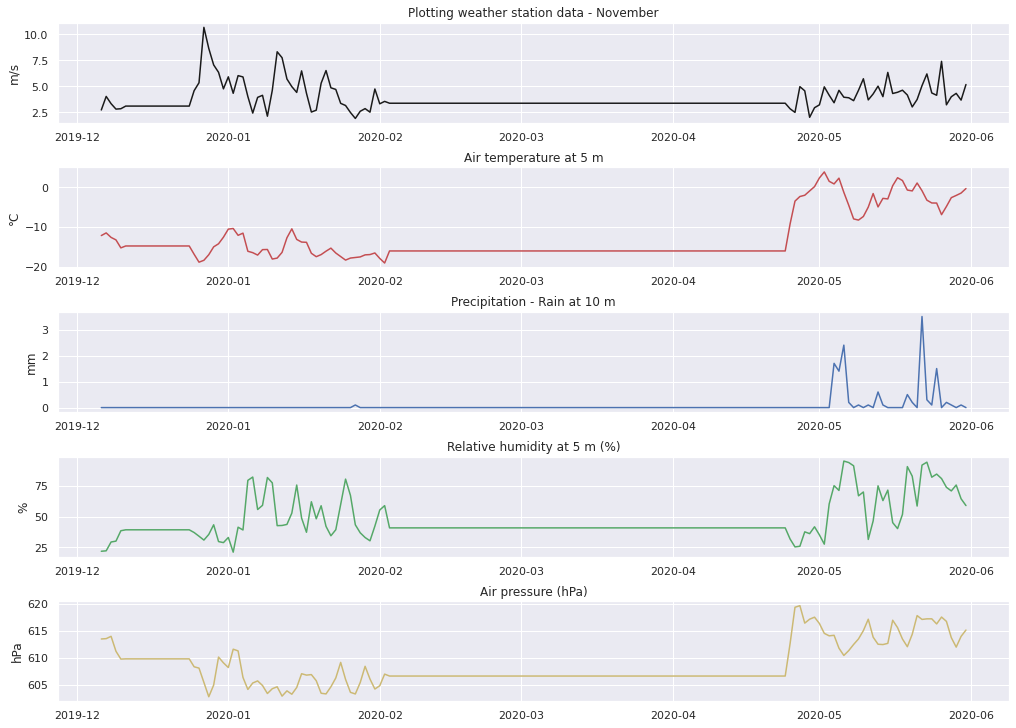

In [26]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

data_AWS_syn_plot = data_AWS_syn['2019-12-06':'2020-05']

f2_ax1.set_title('Plotting weather station data - November')
f2_ax1.plot(data_AWS_syn_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_prep_dailysum['2019-12-06':'2020-05'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Air pressure (hPa)')
f2_ax5.plot(data_AWS_syn_plot['Air pressure (hPa)'], 'y',label='Air pressure (hPa)')
f2_ax5.set_ylabel('hPa')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

### Finding  erroneous data:
* Found two time periods where some the parameters are constant - not possible!
 - (a) '2019-12-12':'2019-12-24'
 - (b) '2020-02':'2020-05'
 
* If we are considering to use this dataset, We need to find efficient ways of dealing with erroneous data. To my knowledge, we can consider:
    - (a) Replacing the values with previous year data (Quick-fix)
    - (b) Modelling the datasets using data-driven techniques (Winter-Holt's method, ARIMA, SARIMA, ...etc.)
    - Research more!!

In [27]:
data_AWS_syn['2019-12-10':'2019-12-25'].head()

,Wind speed at 10 m (m/s),Wind direction at 10 m (°),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Precipitation at 10 m (mm),Air pressure (hPa),Infrared temperature (°C),Infrared temperature (°C),PAR_down,PAR_up,Incoming shortwave radiation (W/m^2),Outgoing shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Outgoing longwave radiation (W/m^2),Net radiation (W/m^2),Soil heat flux at - 0.06 m (W/m^2) - 1,Soil heat flux at - 0.06 m (W/m^2) - 2,Soil heat flux at - 0.06 m (W/m^2) - 3,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-10,2.836722,224.922222,-15.226528,38.553889,0.0,609.759028,-21.289861,-19.852708,41.057757,30.984771,31.23,159.600403,145.679167,228.638889,-96.9,-17.091806,-9.49634,-10.153194,9.287153,10.306944,10.307014,11.077431,7.84634,6.465063,12.249931,-8.726194,-8.683194,-6.332854,-5.404097,-3.550403,-1.275583,-0.082597,0.047771
2019-12-11,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.91000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.82200,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-12,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.91000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.82200,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-13,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.91000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.82200,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000
2019-12-14,3.093000,226.100000,-14.750000,39.310000,0.0,609.800000,-17.950000,-15.940000,68.850000,52.080000,31.23,265.500000,145.700000,238.700000,-96.9,-17.760000,-9.91000,-10.570000,9.260000,10.280000,10.280000,11.060000,7.82200,6.465000,12.250000,-8.870000,-8.810000,-6.431000,-5.465000,-3.575000,-1.300000,-0.083000,0.048000


### Plotting Radiation parameters - Incoming and outgoing longwave and shortwave radiation, Net Radiation [W/m^2]

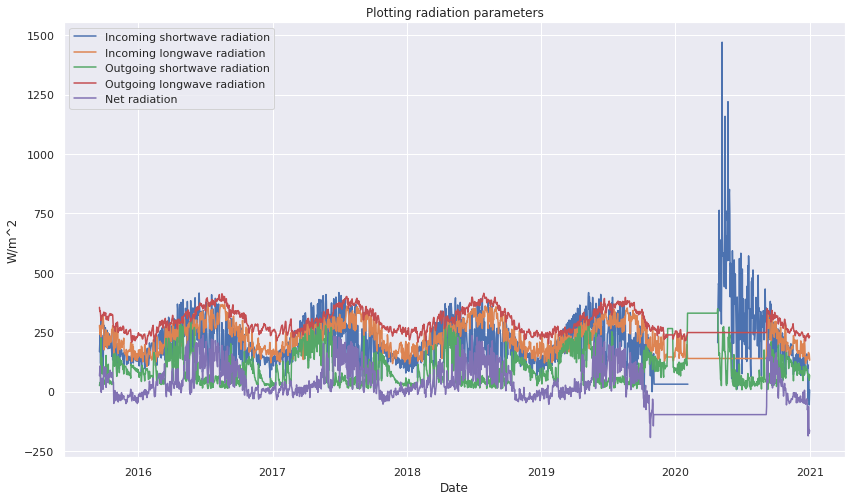

In [28]:
plt.figure(figsize=(14,8))
plt.title('Plotting radiation parameters')
plt.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'],label='Incoming shortwave radiation')
plt.plot(data_AWS_syn['Incoming longwave radiation (W/m^2)'],label='Incoming longwave radiation')
plt.plot(data_AWS_syn['Outgoing shortwave radiation (W/m^2)'],label='Outgoing shortwave radiation')
plt.plot(data_AWS_syn['Outgoing longwave radiation (W/m^2)'],label='Outgoing longwave radiation')
plt.plot(data_AWS_syn['Net radiation (W/m^2)'],label='Net radiation')
plt.ylabel('W/m^2')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

### Comments:
    - The dataset for the year 2020 seems to be erroneous - mainly the incoming and out going shortwave radiation, net radiation, and outgoing longwave radiation. Check in detail!

In [29]:
data_AWS_syn['Net_radiation_calc'] = data_AWS_syn['Incoming shortwave radiation (W/m^2)'] - data_AWS_syn['Outgoing shortwave radiation (W/m^2)'] + data_AWS_syn['Incoming longwave radiation (W/m^2)'] - data_AWS_syn['Outgoing longwave radiation (W/m^2)']

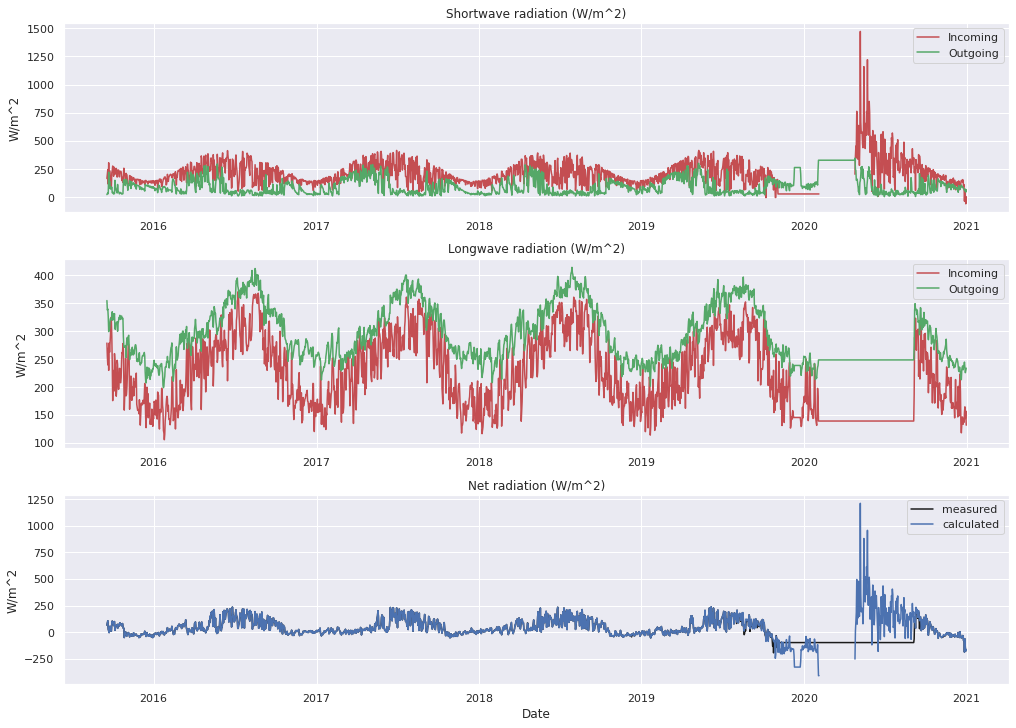

In [30]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])



f2_ax1.set_title('Shortwave radiation (W/m^2)')
f2_ax1.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'],'r', label='Incoming')
f2_ax1.plot(data_AWS_syn['Outgoing shortwave radiation (W/m^2)'],'g', label='Outgoing')
f2_ax1.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Longwave radiation (W/m^2)')
f2_ax2.plot(data_AWS_syn['Incoming longwave radiation (W/m^2)'], 'r',label='Incoming')
f2_ax2.plot(data_AWS_syn['Outgoing longwave radiation (W/m^2)'], 'g',label='Outgoing')
f2_ax2.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Net radiation (W/m^2)')
f2_ax3.plot(data_AWS_syn['Net radiation (W/m^2)'], 'k', label='measured')
f2_ax3.plot(data_AWS_syn['Net_radiation_calc'], 'b', label='calculated')
f2_ax3.set_ylabel('W/m^2')
f2_ax3.set_xlabel('Date')
f2_ax3.legend()
f2_ax3.grid(True)


In [31]:
data_AWS_syn[['Incoming shortwave radiation (W/m^2)','Outgoing shortwave radiation (W/m^2)','Incoming longwave radiation (W/m^2)','Outgoing longwave radiation (W/m^2)','Net radiation (W/m^2)','Net_radiation_calc']].describe()

,Incoming shortwave radiation (W/m^2),Outgoing shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Outgoing longwave radiation (W/m^2),Net radiation (W/m^2),Net_radiation_calc
count,1852.000000,1932.000000,1932.000000,1932.000000,1932.000000,1852.000000
mean,210.194357,102.248858,220.833211,292.078537,24.364237,48.186386
std,116.062383,79.722498,64.570972,49.188007,82.903297,109.410212
min,-56.094861,7.286694,105.954861,199.021528,-193.412417,-408.170000
25%,141.222944,41.789979,163.010243,248.600000,-25.194375,-8.014470
50%,193.328806,75.835031,212.142361,278.910764,14.862934,28.342073
75%,269.000789,139.194151,274.733507,331.282986,78.574293,104.578997
max,1471.012034,348.573819,370.592361,413.986111,239.133924,1212.433395


### Erroneous data

### Plotting the 2020 dataset

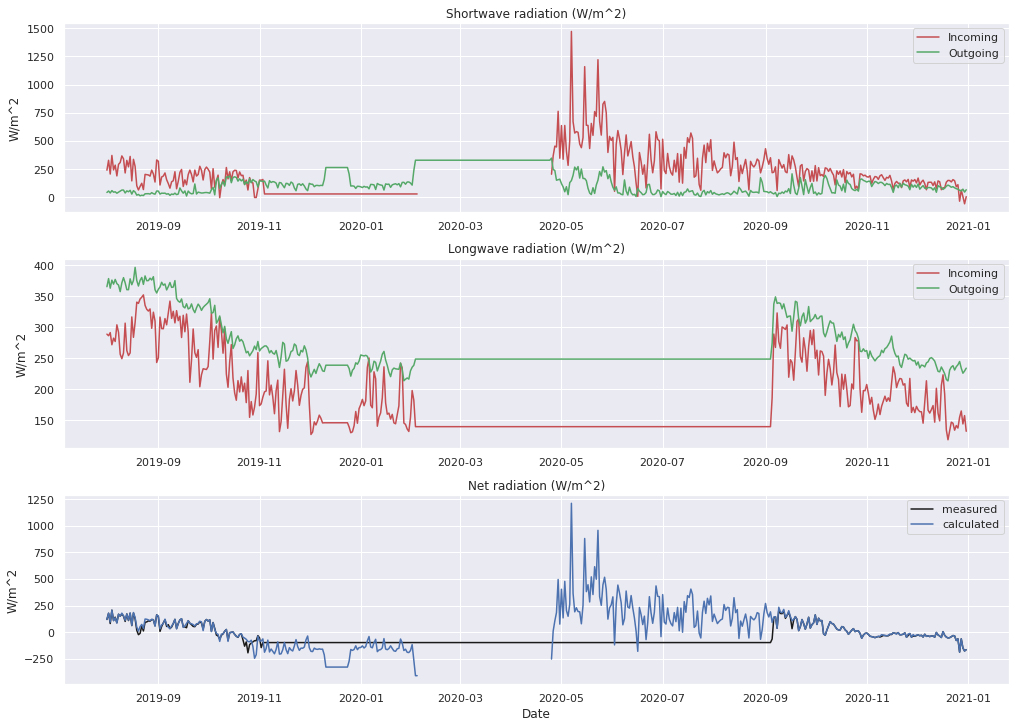

In [32]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])



f2_ax1.set_title('Shortwave radiation (W/m^2)')
f2_ax1.plot(data_AWS_syn['2019-08':]['Incoming shortwave radiation (W/m^2)'],'r', label='Incoming')
f2_ax1.plot(data_AWS_syn['2019-08':]['Outgoing shortwave radiation (W/m^2)'],'g', label='Outgoing')
f2_ax1.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Longwave radiation (W/m^2)')
f2_ax2.plot(data_AWS_syn['2019-08':]['Incoming longwave radiation (W/m^2)'], 'r',label='Incoming')
f2_ax2.plot(data_AWS_syn['2019-08':]['Outgoing longwave radiation (W/m^2)'], 'g',label='Outgoing')
f2_ax2.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Net radiation (W/m^2)')
f2_ax3.plot(data_AWS_syn['2019-08':]['Net radiation (W/m^2)'], 'k', label='measured')
f2_ax3.plot(data_AWS_syn['2019-08':]['Net_radiation_calc'], 'b', label='calculated')
f2_ax3.set_ylabel('W/m^2')
f2_ax3.set_xlabel('Date')
f2_ax3.legend()
f2_ax3.grid(True)

### Comments:
    - Incoming shortwave radiation: Constant and missing values from 2019-11 : 2020-05. They also have very high values from 2020-05 onwards. 
    - Outgoing shortwave radiation: Constant values around 2019-12 and early months of 2020
    - Incoming and outgoing longwave radiation have also a constant value for a longer period of time [2020-02 : 2020-09]
    - The measured net radiation values are constant for a longer period of time from 2019-11 : 2020-09

A good strategy needs to be laid out to deal with these erroneous or missing values if we consider using the dataset

Comments:
* The incoming shortwave radiation (W/m^2) has constant values from '2019-11-03' : '2019-12-31' - hence the dataset cannot be used! - Do we consider modelling the incoming shortwave radiation by back calculating it with outgoing shortwave radiation?
* Can outgoing radiation be greater than the incoming radiation? - I think it can, since heat can be stored and released at a later time?
* The values seems to be in general varying from [0 - 400 W/m^2] - That's okay!
* Most of the cases - Outgoing shortwave radiation < Incoming shortwave radiation - At time periods from 2019-10-01 it is false
* All time periods Outgoing longwave radiation > Incoming longwave radiation
* The measured and calculated net radiation values are mostly similar - Only at some time periods, they are not. The measured values cannot be considered from '2019-11-03' : '2019-12-31'
* The outgoing shortwave radiation [W/m^2] after '2019-12' - has a sudden increase - discard these values or find a replacement.


### Plotting Soil heat flux [W/m^2]

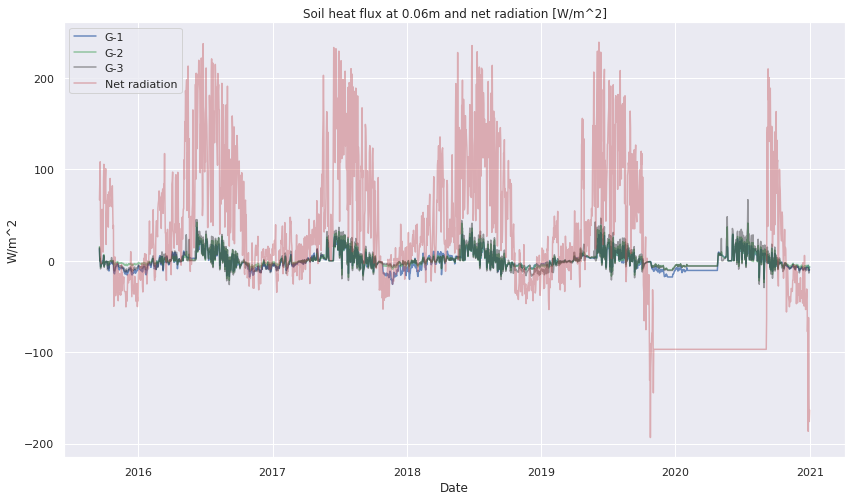

In [33]:
plt.figure(figsize=(14,8))
plt.title('Soil heat flux at 0.06m and net radiation [W/m^2]')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 1'],'b',alpha=0.8,label='G-1')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 2'],'g',alpha=0.6,label='G-2')
plt.plot(data_AWS_syn['Soil heat flux at - 0.06 m (W/m^2) - 3'],'k',alpha=0.4,label='G-3')
plt.plot(data_AWS_syn['Net radiation (W/m^2)'],'r',alpha=0.4,label='Net radiation')

plt.ylabel('W/m^2')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

In [34]:
data_AWS_syn[['Soil heat flux at - 0.06 m (W/m^2) - 1','Soil heat flux at - 0.06 m (W/m^2) - 2','Soil heat flux at - 0.06 m (W/m^2) - 3']].describe()

,Soil heat flux at - 0.06 m (W/m^2) - 1,Soil heat flux at - 0.06 m (W/m^2) - 2,Soil heat flux at - 0.06 m (W/m^2) - 3
count,1932.000000,1932.000000,1932.000000
mean,-0.889387,1.140762,1.080090
std,9.049819,8.670412,10.913594
min,-25.847118,-23.856250,-29.374028
25%,-7.447281,-4.857196,-5.794000
50%,-1.605427,-1.110007,-1.221910
75%,3.886505,3.835682,5.078771
max,36.631549,42.019160,66.850000


Comments:

1. G-1, G-2 and G-3 sensors are all reading very similar sensor values.
    
2. The variations of net radiation seem to correspond to the variations of soil heat flux sensors.

### Plotting soil moisture at different depths 

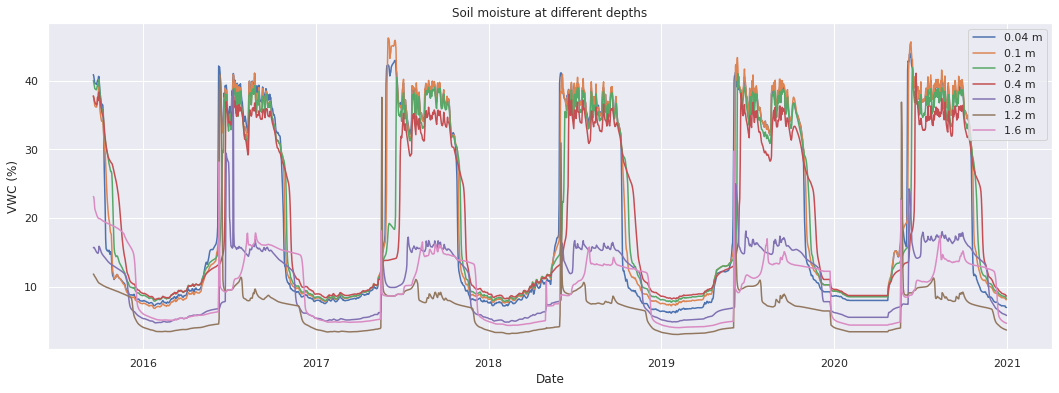

In [35]:
plt.figure(figsize=(18,6))
plt.title('Soil moisture at different depths')
plt.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='0.04 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.1 m (%)'], label='0.1 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='0.2 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='0.4 m')
plt.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='0.8 m')
plt.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='1.2 m')
plt.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='1.6 m')


plt.ylabel('VWC (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. Soil moisture decreases with depth - Good!
2. Soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m have similar moisture contents [during the monsoon period] and also higher soil moisture content than at 0.8 m, 1.2 m and 1.6 m. 
3. There seems to be a grouping of soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m  & 0.8 m, 1.2 m and 1.6 m - There probably exist two different layers of soil? - Similar pattern seen at up-slope, middle-slope and riparian zone.
4. Soil moisture content increases during the indian summer monsoons [2019-06 to 2019-11] - Plot it with precipitation?
5. How to identify if soil is frozen? - Seems to be a constant moisture content during the winter period.
6. On observing the yearly trend, the soil moisture content values have more or less similar trends.

### Plotting soil temperature at different depths

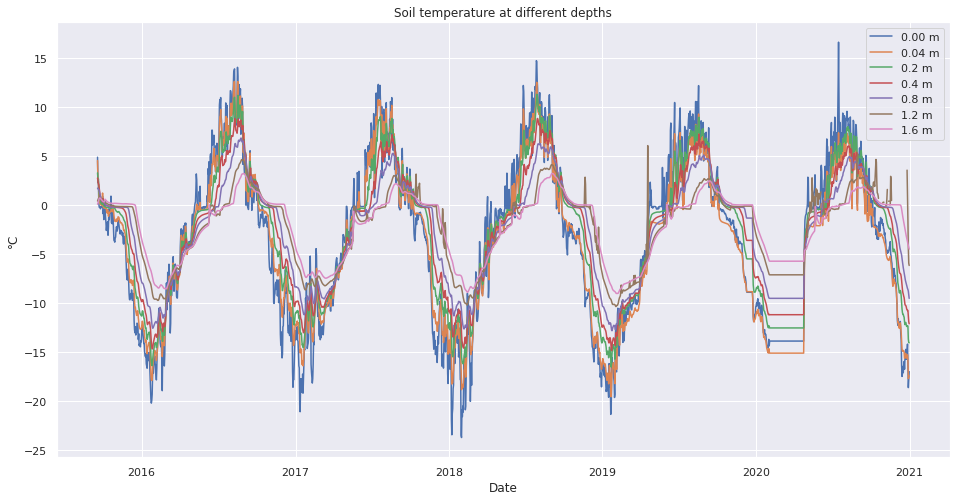

In [36]:
plt.figure(figsize=(16,8))
plt.title('Soil temperature at different depths')
#plt.plot(data_AWS_syn['Air temperature at 5 m (°C)'], label='Air temperature at 5 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.00 m (°C)'], label='0.00 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='0.04 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='0.2 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='0.4 m')
plt.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='0.8 m')
plt.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='1.2 m')
plt.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='1.6 m')
plt.ylabel('°C')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('°Cm-°Cd'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. In the winter the surface is cooler than the subsurface (soil at greater depths) & in the summer, the subsurface is cooler than the surface - Good! 
2. The temperature values increases during the summer and decreases during the winter good!
3. The variations of subsurface temperature decreases with depth.
4. On observing the yearly trend, the temperature variations along different depths seem to be similar.
5. The values are constant somewhere around the early 2020s - Missing data? Take a closer look!

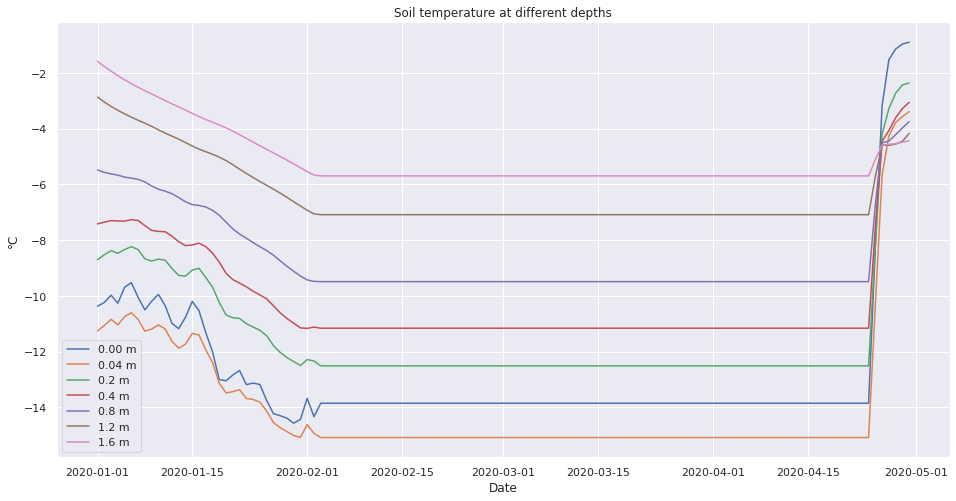

In [37]:
plt.figure(figsize=(16,8))
plt.title('Soil temperature at different depths')
#plt.plot(data_AWS_syn['2020-01':'2020-04']['Air temperature at 5 m (°C)'], label='Air temperature at 5 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.00 m (°C)'], label='0.00 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.04 m (°C)'], label='0.04 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.2 m (°C)'], label='0.2 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.4 m (°C)'], label='0.4 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 0.8 m (°C)'], label='0.8 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 1.2 m (°C)'], label='1.2 m')
plt.plot(data_AWS_syn['2020-01':'2020-04']['Soil temperature at - 1.6 m (°C)'], label='1.6 m')
plt.ylabel('°C')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('°Cm-°Cd'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

- Clearly constant temperature values approximately from 2020-02-01 : 2020-04-20 indicate erroneous data that cannot be considered.

In [38]:
data_AWS_syn['2020-02':'2020-02-15']['Soil temperature at - 0.00 m (°C)']

TIMESTAMP
2020-02-01   -13.673681
2020-02-02   -14.330709
2020-02-03   -13.850000
2020-02-04   -13.850000
2020-02-05   -13.850000
2020-02-06   -13.850000
2020-02-07   -13.850000
2020-02-08   -13.850000
2020-02-09   -13.850000
2020-02-10   -13.850000
2020-02-11   -13.850000
2020-02-12   -13.850000
2020-02-13   -13.850000
2020-02-14   -13.850000
2020-02-15   -13.850000
Freq: D, Name: Soil temperature at - 0.00 m (°C), dtype: float64

### Plotting parameters together:

Text(0, 0.5, '(mm)')

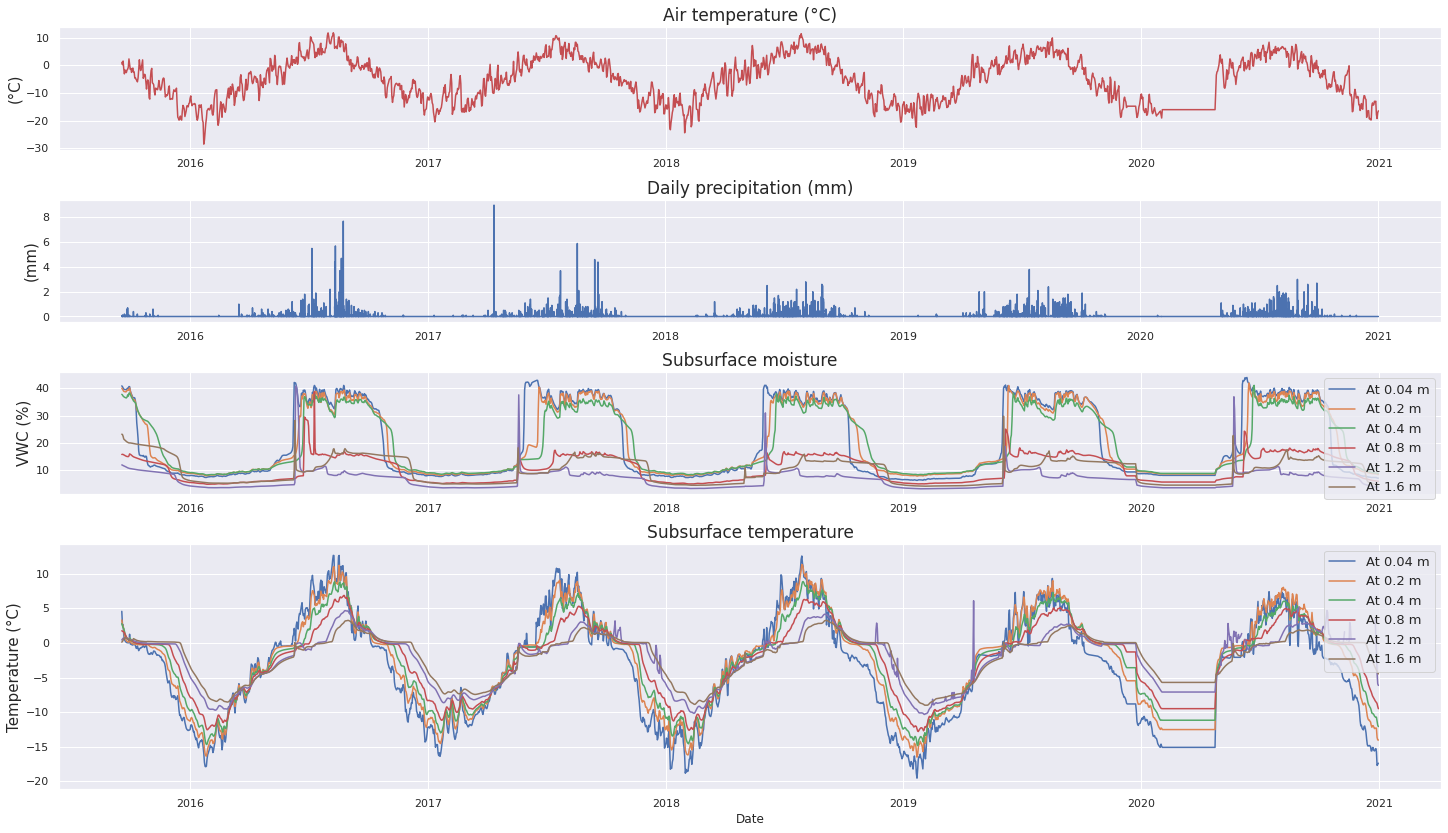

In [39]:
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,2,2], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[2, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])
f2_ax3 = fig2.add_subplot(spec2[0, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 0])

#plt.title('Soil moisture data - Mean hourly values (linearly interpolated for missing values)')

f2_ax1.set_title('Subsurface moisture',fontsize=17)
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.04 m (%)'], label='At 0.04 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.2 m (%)'], label='At 0.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.4 m (%)'], label='At 0.4 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 0.8 m (%)'], label='At 0.8 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.2 m (%)'], label='At 1.2 m')
f2_ax1.plot(data_AWS_syn['Soil moisture at - 1.6 m (%)'], label='At 1.6 m')
f2_ax1.set_ylabel('VWC (%)',fontsize=15)
#f2_ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#f2_ax1.xlabel('Date')
f2_ax1.legend(loc=1,fontsize=13)
f2_ax1.grid(True)

f2_ax2.set_title('Subsurface temperature',fontsize=17)
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.04 m (°C)'], label='At 0.04 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.2 m (°C)'], label='At 0.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.4 m (°C)'], label='At 0.4 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 0.8 m (°C)'], label='At 0.8 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.2 m (°C)'], label='At 1.2 m')
f2_ax2.plot(data_AWS_syn['Soil temperature at - 1.6 m (°C)'], label='At 1.6 m')
f2_ax2.set_ylabel('Temperature (°C)',fontsize=15)
#f2_ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
f2_ax2.set_xlabel('Date')
f2_ax2.legend(loc=1,fontsize=13)
f2_ax2.grid(True)

f2_ax3.set_title('Air temperature (°C)',fontsize=17)
f2_ax3.plot(data_AWS_syn['Air temperature at 5 m (°C)'],'r')
f2_ax3.set_ylabel('(°C)',fontsize=15)



f2_ax4.set_title('Daily precipitation (mm)',fontsize=17)
f2_ax4.plot(data_AWS_prep['Precipitation at 10 m (mm)'])
f2_ax4.set_ylabel('(mm)',fontsize=15)


#plt.savefig('met_data.png',dpi=300,bbox_inches='tight')

### Considering the 2017 dataset since Dr. Xiao article has data at a similar time period [For the first trial]
- The input data required for the model are: [at what elevation?]
1. incoming shortwave radiation [W m^-2]
2. air temperature [K]
3. relative humidity [-]
4. wind speed [m s^-1]
5. precipitation rain [m s^-1] - precipitation rain is required in [m s^-1]? We have mm/day - Check the outputs of thier dataset!
6. precipitation snow [m SWE s^-1]

In [40]:
data_AWS_syn.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

In [41]:
data_AWS_prep_dailysum

TIMESTAMP
2015-09-18    0.0
2015-09-19    0.2
2015-09-20    0.0
2015-09-21    0.0
2015-09-22    1.1
             ... 
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Freq: D, Name: Precipitation at 10 m (mm), Length: 1932, dtype: float64

In [42]:
data_AWS_syn_input = data_AWS_syn['2017'][['Incoming shortwave radiation (W/m^2)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)','Wind speed at 10 m (m/s)']]
data_AWS_syn_input['Precipitation-daily_sum (mm)'] = data_AWS_prep_dailysum['2017']
data_AWS_syn_input.head()

<ipython-input-42-e2dd5540c6fa>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_AWS_syn_input = data_AWS_syn['2017'][['Incoming shortwave radiation (W/m^2)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)','Wind speed at 10 m (m/s)']]


,Incoming shortwave radiation (W/m^2),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Wind speed at 10 m (m/s),Precipitation-daily_sum (mm)
TIMESTAMP,,,,,
2017-01-01,140.572917,-11.643319,26.417292,5.703646,0.0
2017-01-02,136.909653,-12.547639,25.603264,4.522028,0.0
2017-01-03,108.142340,-12.374722,43.428264,5.572090,0.0
2017-01-04,147.933590,-10.819882,30.436111,6.037000,0.0
2017-01-05,147.186458,-10.152083,22.180000,5.978368,0.0


In [43]:
# Snow depth is also a input parameter - data collected from Dr. Xiao's article
Snow_depth = pd.read_excel('Final_data_excelsheet/Yakou_metstation_data_2017_snowdepth.xlsx',sheet_name='snow_depth',index_col=0, parse_dates=True) 
Snow_depth.head()

,Snow depth (m)
Measurement Time,
2017-01-01,0.000375
2017-01-02,0.000208
2017-01-03,0.000125
2017-01-04,0.000458
2017-01-05,0.000250


In [44]:
### Adding snow depth to the input dataframe
data_AWS_syn_input['Snow depth (in m)'] = Snow_depth
data_AWS_syn_input.head()

,Incoming shortwave radiation (W/m^2),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Wind speed at 10 m (m/s),Precipitation-daily_sum (mm),Snow depth (in m)
TIMESTAMP,,,,,,
2017-01-01,140.572917,-11.643319,26.417292,5.703646,0.0,0.000375
2017-01-02,136.909653,-12.547639,25.603264,4.522028,0.0,0.000208
2017-01-03,108.142340,-12.374722,43.428264,5.572090,0.0,0.000125
2017-01-04,147.933590,-10.819882,30.436111,6.037000,0.0,0.000458
2017-01-05,147.186458,-10.152083,22.180000,5.978368,0.0,0.000250


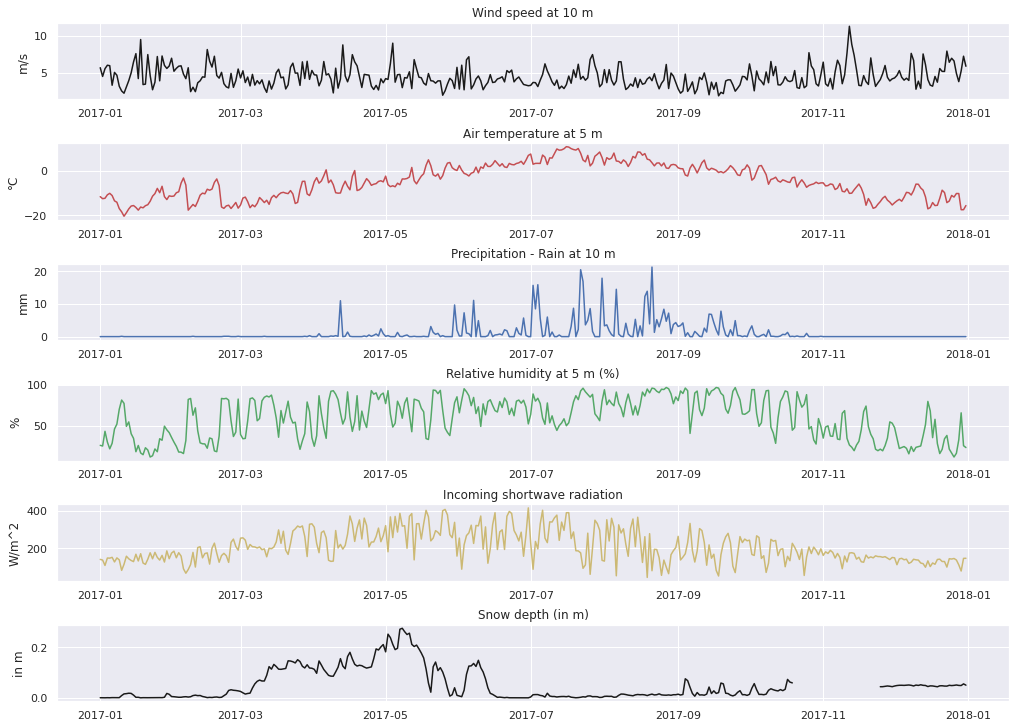

In [45]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_syn_input['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn_input['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_syn_input['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn_input['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
f2_ax5.plot(data_AWS_syn_input['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

f2_ax6.set_title('Snow depth (in m)')
f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

* Comments:
    - Wind speed at 10 m, Air temperature at 5 m, Precipitation (rain) at 10 m, relative humidity, and incoming shortwave radiation all look plausible.
    - Snow depth has missing values from around 2017-10 : 2017-12

Take a closer look for missing values and erroneous data!

### Erroneous and missing data

In [46]:
data_AWS_syn_input.index[np.where(np.isnan(data_AWS_syn_input))[0]], len(data_AWS_syn_input.index[np.where(np.isnan(data_AWS_syn_input))[0]])

(DatetimeIndex(['2017-10-20', '2017-10-21', '2017-10-22', '2017-10-23',
                '2017-10-24', '2017-10-25', '2017-10-26', '2017-10-27',
                '2017-10-28', '2017-10-29', '2017-10-30', '2017-10-31',
                '2017-11-01', '2017-11-02', '2017-11-03', '2017-11-04',
                '2017-11-05', '2017-11-06', '2017-11-07', '2017-11-08',
                '2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
                '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
                '2017-11-17', '2017-11-18', '2017-11-19', '2017-11-20',
                '2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24'],
               dtype='datetime64[ns]', name='TIMESTAMP', freq=None),
 36)

- Overall 36 missing values are found. Probably from the snow depth data? - Check!

In [47]:
len(data_AWS_syn_input['Snow depth (in m)'].index[np.where(np.isnan(data_AWS_syn_input['Snow depth (in m)']))[0]])

36

- All of the missing values are for snow depth - Totally 36
- What can we do now for these missing values? - The only option now is to replace the value with 0 [Think of a method in the future!] (or are the values too less to be considered seriously?)

In [48]:
data_AWS_input_2017 = data_AWS_syn_input.copy()

data_AWS_input_2017['Snow depth (in m)'] = data_AWS_syn_input['Snow depth (in m)'].fillna(0)

In [49]:
data_AWS_input_2017.index[np.where(np.isnan(data_AWS_input_2017))[0]]

DatetimeIndex([], dtype='datetime64[ns]', name='TIMESTAMP', freq=None)

### Unit conversion
1. incoming shortwave radiation [W m^-2] - remains the same.
2. air temperature [K] - From °C --> K [+273.15]
3. relative humidity [-] - remains the same
4. wind speed [m s^-1] - remains the same
5. precipitation rain [m s^-1] - From mm/day --> m/s [/(10^3 * 86400) (or) * 1.1574 X 10^{-8}]
6. precipitation snow [m SWE s^-1] - From m/day --> m/s [/86400]

In [50]:
data_AWS_input_2017.columns

Index(['Incoming shortwave radiation (W/m^2)', 'Air temperature at 5 m (°C)',
       'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m/s)',
       'Precipitation-daily_sum (mm)', 'Snow depth (in m)'],
      dtype='object')

In [51]:
data_input_2017_final = data_AWS_input_2017.copy()

data_input_2017_final['air temperature [K]'] = data_input_2017_final['Air temperature at 5 m (°C)'] + 273.15
data_input_2017_final['precipitation rain [m s^-1]'] = data_input_2017_final['Precipitation-daily_sum (mm)']/(1000*86400)
data_input_2017_final['precipitation snow [m SWE s^-1]'] = data_input_2017_final['Snow depth (in m)']/(86400)
data_input_2017_final.head()

,Incoming shortwave radiation (W/m^2),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Wind speed at 10 m (m/s),Precipitation-daily_sum (mm),Snow depth (in m),air temperature [K],precipitation rain [m s^-1],precipitation snow [m SWE s^-1]
TIMESTAMP,,,,,,,,,
2017-01-01,140.572917,-11.643319,26.417292,5.703646,0.0,0.000375,261.506681,0.0,4.340278e-09
2017-01-02,136.909653,-12.547639,25.603264,4.522028,0.0,0.000208,260.602361,0.0,2.411262e-09
2017-01-03,108.142340,-12.374722,43.428264,5.572090,0.0,0.000125,260.775278,0.0,1.446759e-09
2017-01-04,147.933590,-10.819882,30.436111,6.037000,0.0,0.000458,262.330118,0.0,5.304780e-09
2017-01-05,147.186458,-10.152083,22.180000,5.978368,0.0,0.000250,262.997917,0.0,2.893519e-09


### Final plot that will serve as input into the model:

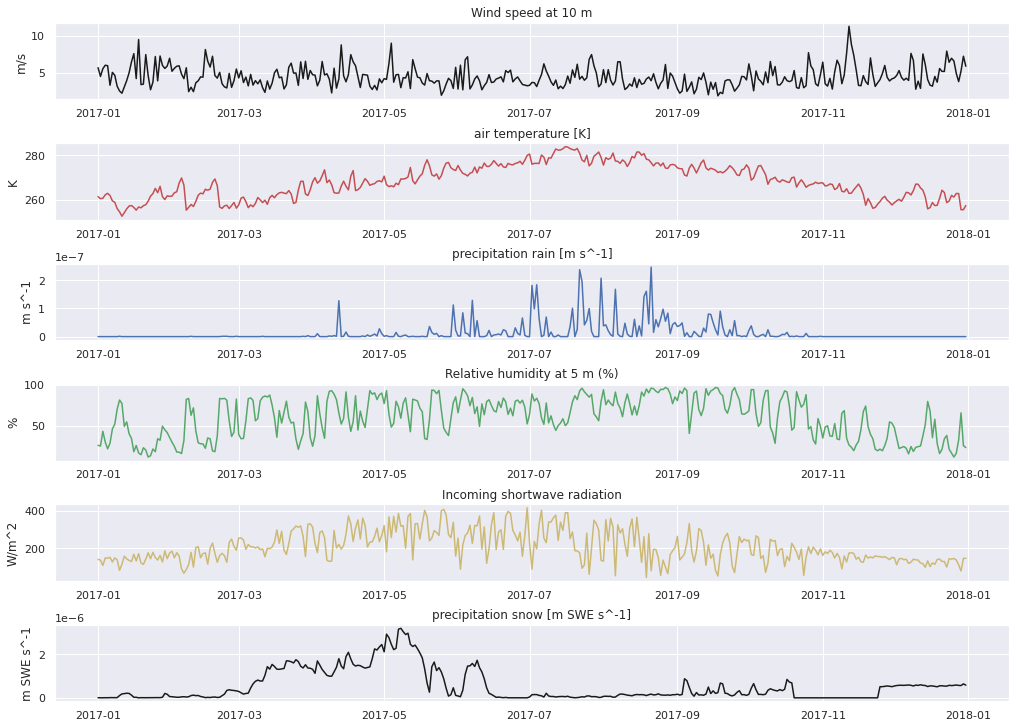

In [52]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input_2017_final['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_input_2017_final['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_input_2017_final['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_input_2017_final['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
f2_ax5.plot(data_input_2017_final['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

f2_ax6.set_title('precipitation snow [m SWE s^-1]')
f2_ax6.plot(data_input_2017_final['precipitation snow [m SWE s^-1]'], 'k',label='precipitation snow [m SWE s^-1]')
f2_ax6.set_ylabel('m SWE s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

In [53]:
data_input_2017_final = data_input_2017_final[['air temperature [K]','Wind speed at 10 m (m/s)','precipitation rain [m s^-1]','Relative humidity at 5 m (%)','Incoming shortwave radiation (W/m^2)','precipitation snow [m SWE s^-1]']]
data_input_2017_final.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1]
TIMESTAMP,,,,,,
2017-01-01,261.506681,5.703646,0.0,26.417292,140.572917,4.340278e-09
2017-01-02,260.602361,4.522028,0.0,25.603264,136.909653,2.411262e-09
2017-01-03,260.775278,5.572090,0.0,43.428264,108.142340,1.446759e-09
2017-01-04,262.330118,6.037000,0.0,30.436111,147.933590,5.304780e-09
2017-01-05,262.997917,5.978368,0.0,22.180000,147.186458,2.893519e-09


In [54]:
### Saving it as an excel sheet
data_input_2017_final.to_excel('input_data_env_variables.xlsx')

In [55]:
### Saving it as an h5 file - not the write way!
#data_input_2017_final.to_hdf('input_data_2017.h5', key='df', mode='w')

In [56]:
#pd.read_hdf('input_data_2017.h5','df')

### Correct way of saving the input data:
#### 1. Actual Yakou data on 2017

In [57]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Model/Yakou_data_2017.h5','w')

In [58]:
# Creating a variable with time instances for 365 days
times = np.arange(0,31536000,86400)
len(times)

365

In [59]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('air temperature [K]', data=data_input_2017_final['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_input_2017_final['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_input_2017_final['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_input_2017_final['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_input_2017_final['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_input_2017_final['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (365,), type "<f8">

In [60]:
hf_input.close()

In [61]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Model/Yakou_data_2017.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(np.array(hdf.get('air temperature [K]')))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


[261.50668056 260.60236111 260.77527778 262.33011806 262.99791667
 262.01014583 259.62430556 258.99618056 256.14819444 254.69534722
 252.72430556 254.28819444 256.01090278 257.28423611 257.52076389
 256.66097222 255.45847222 256.85131944 256.49284722 257.45180556
 257.88902778 259.45833333 261.71832639 262.86976389 265.21438194
 263.27886806 266.16088194 261.51579167 260.20236111 261.87138889
 261.63586806 261.77877083 263.25115278 263.70654861 267.60168056
 269.87872222 266.72029861 255.45569444 256.75361111 258.00395833
 257.08951389 259.40361111 262.17290278 263.08611111 262.77805556
 264.84033333 264.38692361 264.90507639 267.9043125  269.44990278
 266.44986111 256.86791667 256.25395833 257.35951389 257.66124306
 256.19326389 257.48076389 258.90381944 256

#### 2. Yakou data 2017 - Cyclic 5 years
- In order to run the model for simulations over a longer time period, we will be copying 2017 values for another 4 years. This is will be a method that could be employed for dynamic simulations.

In [62]:
# Creating a variable with time instances for 365 days * 5 years = 1825 days
times = np.arange(0,86400*365*5,86400)
len(times)

1825

In [63]:
len(np.arange(1,366,1))

365

In [64]:
# Copying the data - 4 times
data_input_2017_final.index = np.arange(1,366,1)
data_input_2017_final

frames = [data_input_2017_final,data_input_2017_final,data_input_2017_final,data_input_2017_final,data_input_2017_final]
data_input_2017_cyclic_5yrs = pd.concat(frames)

data_input_2017_cyclic_5yrs.index = np.arange(1,365*5+1,1)

data_input_2017_cyclic_5yrs.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1]
1,261.506681,5.703646,0.0,26.417292,140.572917,4.340278e-09
2,260.602361,4.522028,0.0,25.603264,136.909653,2.411262e-09
3,260.775278,5.572090,0.0,43.428264,108.142340,1.446759e-09
4,262.330118,6.037000,0.0,30.436111,147.933590,5.304780e-09
5,262.997917,5.978368,0.0,22.180000,147.186458,2.893519e-09


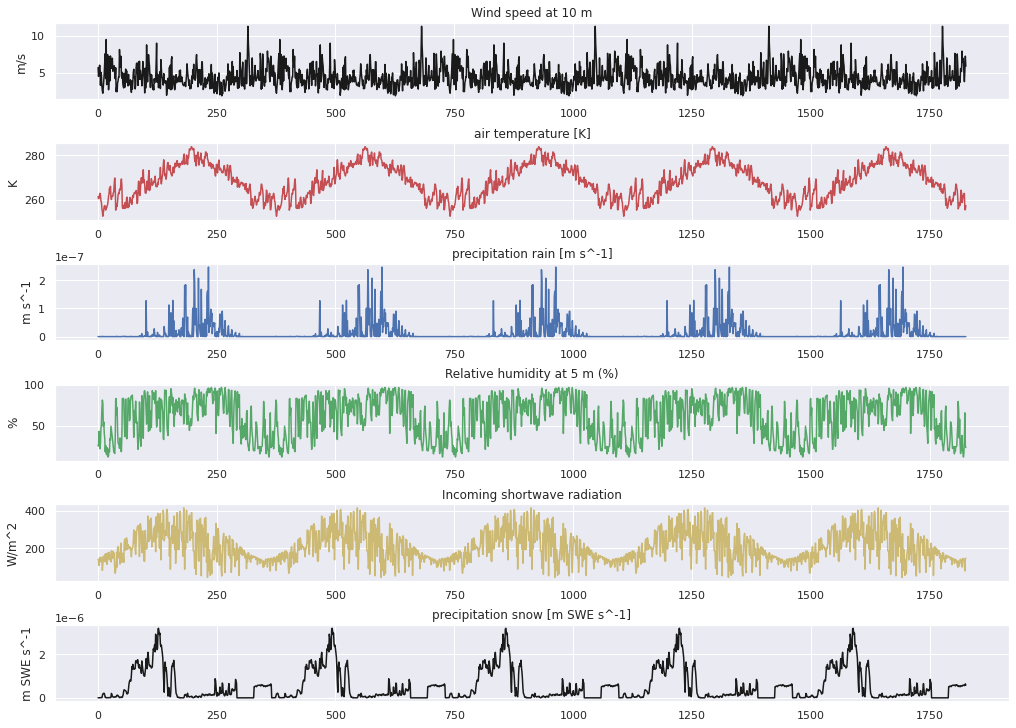

In [65]:
### Plotting the results for 5 years

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input_2017_cyclic_5yrs['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_input_2017_cyclic_5yrs['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_input_2017_cyclic_5yrs['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_input_2017_cyclic_5yrs['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
f2_ax5.plot(data_input_2017_cyclic_5yrs['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

f2_ax6.set_title('precipitation snow [m SWE s^-1]')
f2_ax6.plot(data_input_2017_cyclic_5yrs['precipitation snow [m SWE s^-1]'], 'k',label='precipitation snow [m SWE s^-1]')
f2_ax6.set_ylabel('m SWE s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

In [66]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Model/Yakou_data_2017_cyclic_5yrs.h5','w')

In [67]:
# Creating a variable with time instances for 365 days
times_cyclic_5_years = np.arange(0,31536000*5,86400)
len(times)

1825

In [68]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times_cyclic_5_years)
hf_input.create_dataset('air temperature [K]', data=data_input_2017_cyclic_5yrs['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_input_2017_cyclic_5yrs['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_input_2017_cyclic_5yrs['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_input_2017_cyclic_5yrs['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_input_2017_cyclic_5yrs['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_input_2017_cyclic_5yrs['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (1825,), type "<f8">

In [69]:
hf_input.close()

### Trying another method to create the h5 files

In [70]:
#import convert_met_to_h5

In [71]:
### Storing the data as a text file
#data_input_2017_cyclic_5yrs.to_csv('Final_InputData_Model/Yakou_data_2017_cyclic_5yrs.txt',sep=" ")

In [72]:
#convert_met_to_h5.convert('Final_InputData_Model/Yakou_data_2017_cyclic_5yrs.txt')

In [73]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
#with h5py.File(f'Final_InputData_Model/Yakou_data_2017_cyclic_5yrs.h5','r') as hdf:
    #ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temp_cyclic_5yrs = np.array(hdf.get('air temperature [K]'))
    #print(air_temp_cyclic_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

#### 3. Yakou data 2017 - Smoothened mean
- It is often observed that smoothened values provide a good transition from one discretized time step to the next. Hence, we will be considering smoothened values for all variables. [Is it okay to smoothen precipitation?]
- Currently I have selected 7 day mean [This will provide weekly averages]

In [73]:
# Test
df_pandas = pd.DataFrame(data=np.arange(1,11,1))
df_pandas.rolling(2,min_periods=1).mean().head()

,0
0,1.0
1,1.5
2,2.5
3,3.5
4,4.5


In [74]:
# Creating a copy of the 2017 data
data_input_2017_smoothened = data_input_2017_final.copy()

# Finding the rolling average: https://medium.com/@teamastertoast/smoothing-time-series-in-python-a-walkthrough-with-covid-19-data-b4ccfb980a61
data_input_2017_smoothened = data_input_2017_smoothened.rolling(7,min_periods=1).mean()

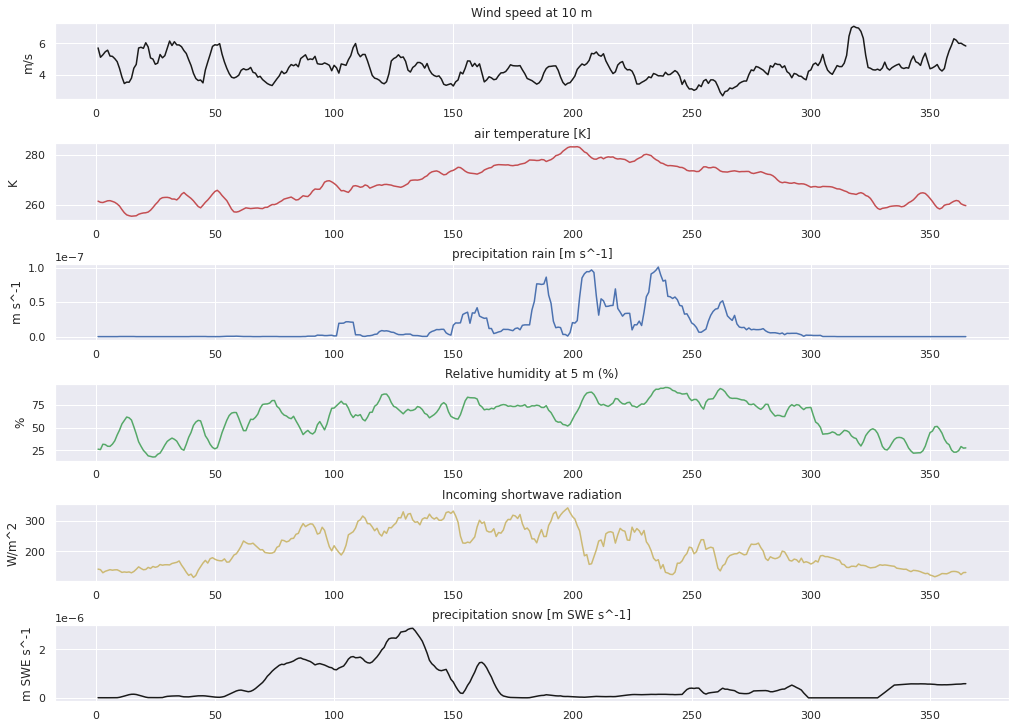

In [75]:
### Plotting the results for 5 years

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input_2017_smoothened['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_input_2017_smoothened['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_input_2017_smoothened['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_input_2017_smoothened['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
f2_ax5.plot(data_input_2017_smoothened['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

f2_ax6.set_title('precipitation snow [m SWE s^-1]')
f2_ax6.plot(data_input_2017_smoothened['precipitation snow [m SWE s^-1]'], 'k',label='precipitation snow [m SWE s^-1]')
f2_ax6.set_ylabel('m SWE s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

In [76]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Model/Yakou_data_2017_smoothened.h5','w')

In [77]:
# Creating a variable with time instances for 365 days
times = np.arange(0,31536000,86400)
len(times)

365

In [78]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('air temperature [K]', data=data_input_2017_smoothened['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_input_2017_smoothened['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_input_2017_smoothened['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_input_2017_smoothened['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_input_2017_smoothened['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_input_2017_smoothened['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (365,), type "<f8">

In [79]:
hf_input.close()

In [80]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Model/Yakou_data_2017_smoothened.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_smoothened = np.array(hdf.get('air temperature [K]'))
    print(air_temp_smoothened)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


[261.50668056 261.05452083 260.96143981 261.30360938 261.64247083
 261.70375    261.40668651 261.04804365 260.41173413 259.54317262
 258.17091369 256.92666766 256.06963294 255.7353373  255.52456349
 255.59781746 255.70683532 256.29640873 256.61135913 256.81720238
 256.90360119 257.18039683 257.90287599 258.96163194 260.15635516
 261.12578671 262.36994048 262.8880496  262.99433929 263.01620536
 262.83993452 262.34913294 262.34517361 261.99455456 262.86396726
 264.24630456 264.93900595 264.05612401 263.33824405 262.58864484
 261.64335417 260.47220139 259.37137004 258.8522004  259.89825198
 261.05349802 261.9653502  263.08185913 264.29624504 265.33581647
 265.81635218 264.97204663 263.74542163 262.74150595 261.70667262
 260.03366567 258.32378869 257.24578274 257

In [81]:
len(air_temp_smoothened)

365

#### 4. Yakou data 2017 - Smoothened mean for 5 years
- It is often observed that smoothened values provide a good transition from one discretized time step to the next. Hence, we will be considering smoothened values for all variables. [Is it okay to smoothen precipitation?]
- Currently I have selected 7 day mean [This will provide weekly averages]
- The smoothened has been copied 4 times to create the 5 year dataset

In [82]:
# Copying the data - 4 times
data_input_2017_smoothened.index = np.arange(1,366,1)

frames = [data_input_2017_smoothened,data_input_2017_smoothened,data_input_2017_smoothened,data_input_2017_smoothened,data_input_2017_smoothened]
data_input_2017_smoothened_5yrs = pd.concat(frames)

data_input_2017_smoothened_5yrs.index = np.arange(1,365*5+1,1)

data_input_2017_smoothened_5yrs.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1]
1,261.506681,5.703646,0.0,26.417292,140.572917,4.340278e-09
2,261.054521,5.112837,0.0,26.010278,138.741285,3.375770e-09
3,260.961440,5.265921,0.0,31.816273,128.541637,2.732766e-09
4,261.303609,5.458691,0.0,31.471233,133.389625,3.375770e-09
5,261.642471,5.562626,0.0,29.612986,136.148992,3.279319e-09


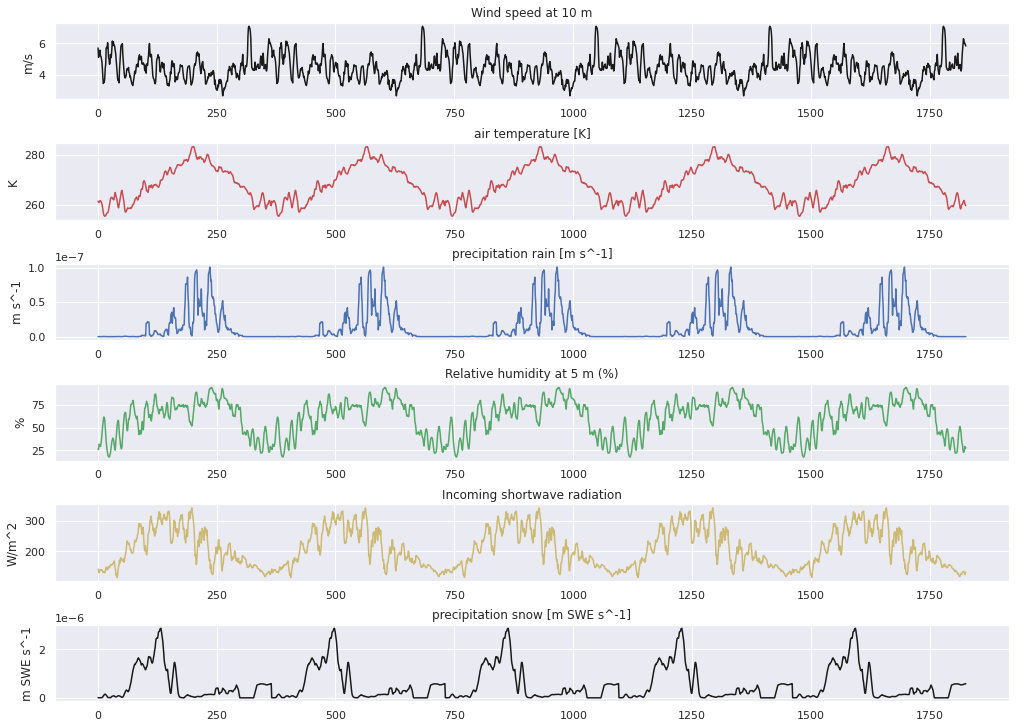

In [83]:
### Plotting the results for 5 years

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input_2017_smoothened_5yrs['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_input_2017_smoothened_5yrs['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_input_2017_smoothened_5yrs['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_input_2017_smoothened_5yrs['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
f2_ax5.plot(data_input_2017_smoothened_5yrs['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

f2_ax6.set_title('precipitation snow [m SWE s^-1]')
f2_ax6.plot(data_input_2017_smoothened_5yrs['precipitation snow [m SWE s^-1]'], 'k',label='precipitation snow [m SWE s^-1]')
f2_ax6.set_ylabel('m SWE s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

In [84]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Model/Yakou_data_2017_smoothened_5yrs.h5','w')

In [85]:
# Creating a variable with time instances for 365 days
times_5yrs = np.arange(0,31536000*5,86400)
len(times)

365

In [86]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times_5yrs)
hf_input.create_dataset('air temperature [K]', data=data_input_2017_smoothened_5yrs['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_input_2017_smoothened_5yrs['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_input_2017_smoothened_5yrs['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_input_2017_smoothened_5yrs['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_input_2017_smoothened_5yrs['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_input_2017_smoothened_5yrs['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (1825,), type "<f8">

In [87]:
hf_input.close()

In [88]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Model/Yakou_data_2017_smoothened_5yrs.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_smoothened = np.array(hdf.get('air temperature [K]'))
    print(air_temp_smoothened)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


[261.50668056 261.05452083 260.96143981 ... 260.45768155 260.00567758
 259.71404067]


In [89]:
len(air_temp_smoothened)

1825

#### 5. Yakou data 2017 - Constant precipitation for 5 years
- To observe the influence of precipitation, we can add a constant precipitation value at the top for a definite time period
- Considering 0.5 e-07 m/s (average precitation of constant precipitation from 150 - 300 days 
- We need to convert m/s --> mols/(m^2 s), therefore multiply by 1000*55 [(1 kg/(m^2 s) = 1000 (kg/m^3) * m/s & 1 mole = (1/55) kg of water]
- Consider a -ve sign x-special/nautilus-clipboard
copy
file:///home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_InputData_Model/Yakou_data_constprep_5yrs.h5


In [90]:
# Copying the data to another variable
data_input_2017_constprep_5yrs = data_input_2017_final.copy()

# First setting the precipitation = 0
data_input_2017_constprep_5yrs['precipitation rain [m s^-1]'] = 0
data_input_2017_constprep_5yrs['precipitation rain [m s^-1]'][150:300] = - 0.5e-7*1000*55

<ipython-input-90-82f089e3b0ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input_2017_constprep_5yrs['precipitation rain [m s^-1]'][150:300] = - 0.5e-7*1000*55


In [91]:
# Copying the data - 4 times
data_input_2017_constprep_5yrs.index = np.arange(1,366,1)

frames = [data_input_2017_constprep_5yrs,data_input_2017_constprep_5yrs,data_input_2017_constprep_5yrs,data_input_2017_constprep_5yrs,data_input_2017_constprep_5yrs]
data_input_2017_constprep_5yrs = pd.concat(frames)

data_input_2017_constprep_5yrs.index = np.arange(1,365*5+1,1)

data_input_2017_constprep_5yrs.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1]
1,261.506681,5.703646,0.0,26.417292,140.572917,4.340278e-09
2,260.602361,4.522028,0.0,25.603264,136.909653,2.411262e-09
3,260.775278,5.572090,0.0,43.428264,108.142340,1.446759e-09
4,262.330118,6.037000,0.0,30.436111,147.933590,5.304780e-09
5,262.997917,5.978368,0.0,22.180000,147.186458,2.893519e-09


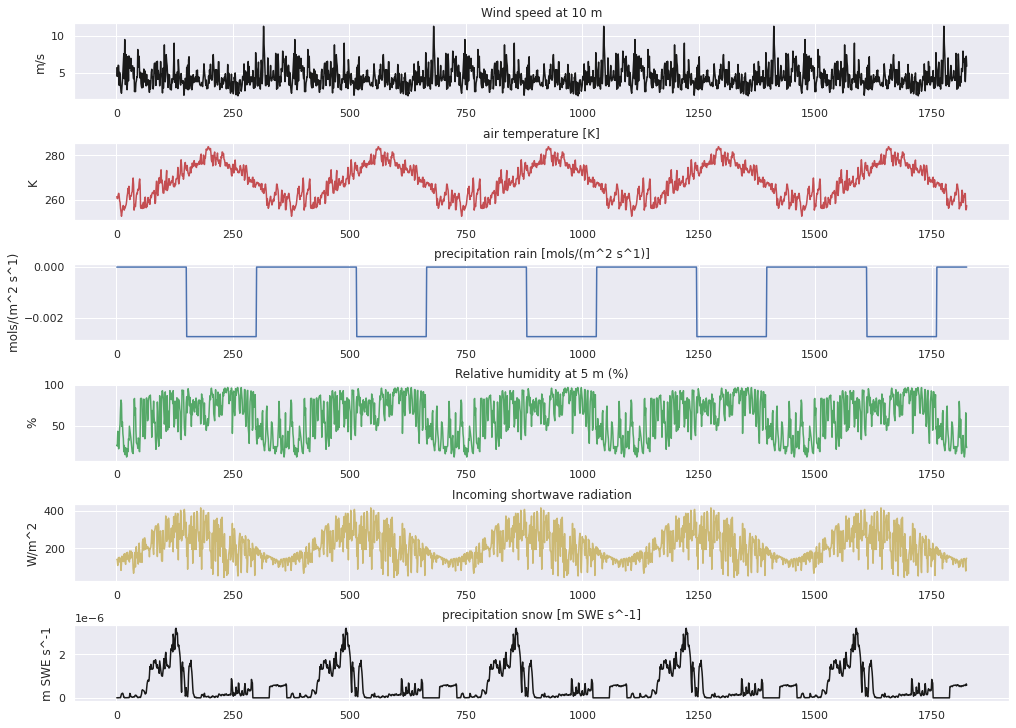

In [92]:
### Plotting the results for 5 years

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input_2017_constprep_5yrs['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_input_2017_constprep_5yrs['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [mols/(m^2 s^1)]')
f2_ax3.plot(data_input_2017_constprep_5yrs['precipitation rain [m s^-1]'], 'b',label='precipitation rain [mols/(m^2 s^1)]')
f2_ax3.set_ylabel('mols/(m^2 s^1)')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_input_2017_constprep_5yrs['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
f2_ax5.plot(data_input_2017_constprep_5yrs['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

f2_ax6.set_title('precipitation snow [m SWE s^-1]')
f2_ax6.plot(data_input_2017_constprep_5yrs['precipitation snow [m SWE s^-1]'], 'k',label='precipitation snow [m SWE s^-1]')
f2_ax6.set_ylabel('m SWE s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

In [93]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Model/Yakou_data_constprep_5yrs.h5','w')

In [94]:
# Creating a variable with time instances for 365 days
times_5yrs = np.arange(0,31536000*5,86400)
len(times)

365

In [95]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times_5yrs)
hf_input.create_dataset('air temperature [K]', data=data_input_2017_constprep_5yrs['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_input_2017_constprep_5yrs['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_input_2017_constprep_5yrs['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_input_2017_constprep_5yrs['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_input_2017_constprep_5yrs['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_input_2017_constprep_5yrs['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (1825,), type "<f8">

In [96]:
hf_input.close()

In [97]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Model/Yakou_data_constprep_5yrs.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    prep_constant = np.array(hdf.get('precipitation rain [m s^-1]'))
    print(prep_constant)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


[0. 0. 0. ... 0. 0. 0.]


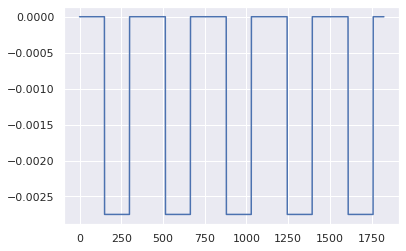

In [98]:
plt.plot(prep_constant)

#### 6. Yakou data 2017 - Actual precipitation for 5 years
- To observe the actual precipitation influence, we will be adding precipitation as an outward mass flux at the top.  
- We need to convert m/s --> mols/(m^2 s), therefore multiply by 1000*55 [(1 kg/(m^2 s) = 1000 (kg/m^3) * m/s & 1 mole = (1/55) kg of water]
- Consider a -ve sign (as it is outwards)

In [99]:
# Copying the data to another variable
data_input_2017_actualprep_5yrs = data_input_2017_final.copy()

# Converting to the right units - [(1 kg/(m^2 s) = 1000 (kg/m^3) * m/s & 1 mole = (1/55) kg of water]
data_input_2017_actualprep_5yrs['precipitation rain [mols m^-2 s^-1]'] = - data_input_2017_actualprep_5yrs['precipitation rain [m s^-1]']*1000*55

In [100]:
# Copying the data - 4 times
data_input_2017_actualprep_5yrs.index = np.arange(1,366,1)

frames = [data_input_2017_actualprep_5yrs,data_input_2017_actualprep_5yrs,data_input_2017_actualprep_5yrs,data_input_2017_actualprep_5yrs,data_input_2017_actualprep_5yrs]
data_input_2017_actualprep_5yrs = pd.concat(frames)

data_input_2017_actualprep_5yrs.index = np.arange(1,365*5+1,1)

data_input_2017_actualprep_5yrs.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1],precipitation rain [mols m^-2 s^-1]
1,261.506681,5.703646,0.0,26.417292,140.572917,4.340278e-09,-0.0
2,260.602361,4.522028,0.0,25.603264,136.909653,2.411262e-09,-0.0
3,260.775278,5.572090,0.0,43.428264,108.142340,1.446759e-09,-0.0
4,262.330118,6.037000,0.0,30.436111,147.933590,5.304780e-09,-0.0
5,262.997917,5.978368,0.0,22.180000,147.186458,2.893519e-09,-0.0


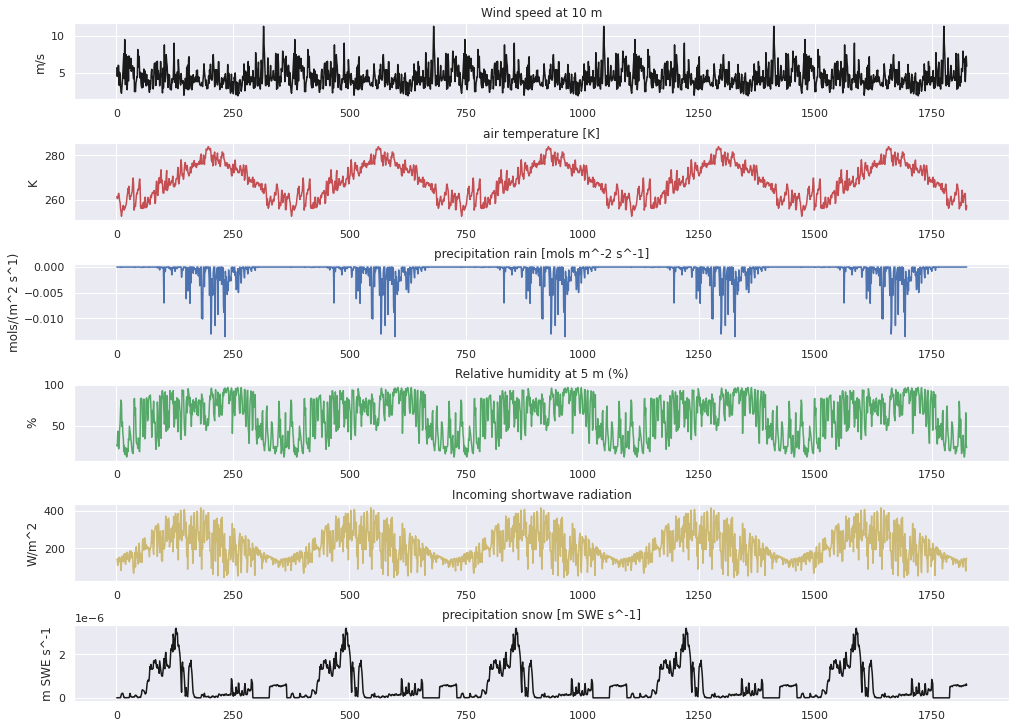

In [101]:
### Plotting the results for 5 years

fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_input_2017_actualprep_5yrs['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_input_2017_actualprep_5yrs['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [mols m^-2 s^-1]')
f2_ax3.plot(data_input_2017_actualprep_5yrs['precipitation rain [mols m^-2 s^-1]'], 'b',label='precipitation rain [mols m^-2 s^-1]')
f2_ax3.set_ylabel('mols/(m^2 s^1)')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_input_2017_actualprep_5yrs['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
f2_ax5.plot(data_input_2017_actualprep_5yrs['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

f2_ax6.set_title('precipitation snow [m SWE s^-1]')
f2_ax6.plot(data_input_2017_actualprep_5yrs['precipitation snow [m SWE s^-1]'], 'k',label='precipitation snow [m SWE s^-1]')
f2_ax6.set_ylabel('m SWE s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax6.grid(True)

In [102]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Model/Yakou_data_actualprep_5yrs.h5','w')

In [103]:
# Creating a variable with time instances for 365 days
times_5yrs = np.arange(0,31536000*5,86400)
len(times)

365

In [104]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times_5yrs)
hf_input.create_dataset('air temperature [K]', data=data_input_2017_actualprep_5yrs['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_input_2017_actualprep_5yrs['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_input_2017_actualprep_5yrs['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('precipitation rain [mols m^-2 s^-1]', data=data_input_2017_actualprep_5yrs['precipitation rain [mols m^-2 s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_input_2017_actualprep_5yrs['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_input_2017_actualprep_5yrs['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_input_2017_actualprep_5yrs['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (1825,), type "<f8">

In [105]:
hf_input.close()

In [106]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Model/Yakou_data_actualprep_5yrs.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    prep_constant = np.array(hdf.get('precipitation rain [mols m^-2 s^-1]'))
    print(prep_constant)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation rain [mols m^-2 s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


[-0. -0. -0. ... -0. -0. -0.]


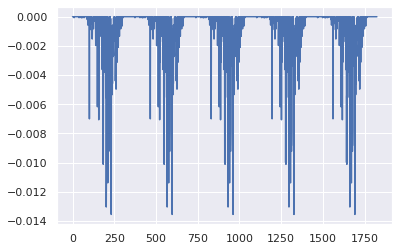

In [107]:
plt.plot(prep_constant)

#### 7. Yakou data 2017 - Subsurface temperature at 5 cm as Top.B.C
- A comparison between air temperature and subusrface temperature at 5 cm as the top B.C. is required to be analyzed. This will exclude all the influences due the atmosphere and the surface.
- Consider a -ve sign (as it is outwards)

In [112]:
# Adding 2017 simulations to the dataframe - 
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn['Soil temperature at - 0.04 m (°C)']))[0]]
# It appears to have no null values - We can add it to the dataset

DatetimeIndex([], dtype='datetime64[ns]', name='TIMESTAMP', freq=None)

In [116]:
len(data_AWS_syn['Soil temperature at - 0.04 m (°C)']['2017'])

365

In [122]:
data_input_2017_subtemp_5cm = data_input_2017_final.copy()
data_input_2017_subtemp_5cm['Soil temperature at - 0.04 m (K)'] = data_AWS_syn['Soil temperature at - 0.04 m (°C)']['2017'].values + 273.15
data_input_2017_subtemp_5cm.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1],Soil temperature at - 0.04 m (K)
1,261.506681,5.703646,0.0,26.417292,140.572917,4.340278e-09,261.023264
2,260.602361,4.522028,0.0,25.603264,136.909653,2.411262e-09,261.006667
3,260.775278,5.572090,0.0,43.428264,108.142340,1.446759e-09,260.854861
4,262.330118,6.037000,0.0,30.436111,147.933590,5.304780e-09,261.032708
5,262.997917,5.978368,0.0,22.180000,147.186458,2.893519e-09,261.347014


In [123]:
data_input_2017_subtemp_5cm['precipitation rain [mols m^-2 s^-1]'] = - data_input_2017_subtemp_5cm['precipitation rain [m s^-1]']*1000*55

In [124]:
data_input_2017_subtemp_5cm.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1],Soil temperature at - 0.04 m (K),precipitation rain [mols m^-2 s^-1]
1,261.506681,5.703646,0.0,26.417292,140.572917,4.340278e-09,261.023264,-0.0
2,260.602361,4.522028,0.0,25.603264,136.909653,2.411262e-09,261.006667,-0.0
3,260.775278,5.572090,0.0,43.428264,108.142340,1.446759e-09,260.854861,-0.0
4,262.330118,6.037000,0.0,30.436111,147.933590,5.304780e-09,261.032708,-0.0
5,262.997917,5.978368,0.0,22.180000,147.186458,2.893519e-09,261.347014,-0.0


In [125]:
# Opening the input file
hf_input = h5py.File('Final_InputData_Model/Yakou_data_subtemp5cm_2017.h5','w')

In [103]:
# Creating a variable with time instances for 365 days
times = np.arange(0,31536000,86400)
len(times)

365

In [126]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('air temperature [K]', data=data_input_2017_subtemp_5cm['air temperature [K]'].values)
hf_input.create_dataset('Soil temperature at - 0.04 m (K)', data=data_input_2017_subtemp_5cm['Soil temperature at - 0.04 m (K)'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_input_2017_subtemp_5cm['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_input_2017_subtemp_5cm['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('precipitation rain [mols m^-2 s^-1]', data=data_input_2017_subtemp_5cm['precipitation rain [mols m^-2 s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_input_2017_subtemp_5cm['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_input_2017_subtemp_5cm['Incoming shortwave radiation (W/m^2)'].values)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_input_2017_subtemp_5cm['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (365,), type "<f8">

In [127]:
hf_input.close()

In [128]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_Model/Yakou_data_subtemp5cm_2017.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    temp_5cm = np.array(hdf.get('Soil temperature at - 0.04 m (K)'))
    print(temp_5cm)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.04 m (K)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation rain [mols m^-2 s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


[261.02326389 261.00666667 260.85486111 261.03270833 261.34701389
 261.080625   261.1825     260.61652778 260.05826389 260.68041667
 259.40020833 258.08736111 258.46638889 258.47388889 258.46555556
 257.2475     256.88069444 257.28326389 256.77284722 257.15430556
 257.79034722 258.60034722 259.16305556 260.00541667 261.42319444
 262.38886806 262.83889583 263.05069444 261.94090278 261.01208333
 260.34104167 260.11833333 261.20944444 262.1230625  263.82234028
 264.91457639 265.24615972 262.06125    260.95784722 260.21527778
 259.58729167 259.22576389 259.44013889 260.10847222 260.18229167
 261.28201389 262.18708333 262.71927083 263.7728125  265.48983333
 266.7219375  265.55454167 264.363

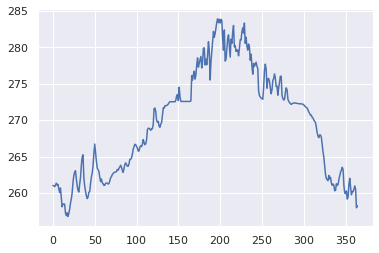

In [130]:
plt.plot(temp_5cm)